# Wrangle and analize data (WERATEDOGS Twitter)
***By Gonzalo Arancibia Bernal***
    
    
# 0. Project Overview
## 0.1. Introduction
Real-world data rarely comes clean. Using Python and its libraries, you will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. You will document your wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that you will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.

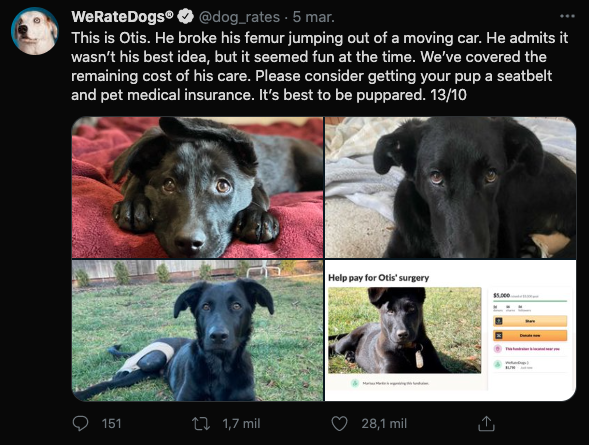

## 02. Project Details 

The task in this project are:
1. Gathering data
2. Assessing data
3. Cleaning data
4. Storing, analyzing, and visualizing wrangled data
5. Reporting on:
    - Data wrangling efforts
    - Data analyses and visualizations

# 1. Gathering Data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests as rq
import tweepy 
import json
import warnings
import os
import re
import time

### 1.1. Twitter archive
reading csv as pandas dataframe

In [2]:
archive_df = pd.read_csv('/Users/Robotongo/Desktop/udacity/dogs/datasets/twitter-archive-enhanced.csv')
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 1.2. Image prediction
available for programmatically download

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = rq.get(url)

with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep= '\t')
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 1.3. Twitter API (JSON) via Tweepy
*https://realpython.com/python-exceptions/#the-try-and-except-block-handling-exceptions

In [4]:
#reading json txt file without using API
df_api = pd.read_json('/Users/Robotongo/Desktop/udacity/dogs/datasets/tweet-json.txt', lines=True)

**will try to download the API data once Twitter accept my development requirement**
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)


#Read text file line by line to create dataframe
tweets_data = []
with open['/Users/Robotongo/Desktop/udacity/dogs/datasets/tweet-json.txt'] as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue
            
df_api = pd.DataFrame(tweets_data, columns = list(tweets_data[0].keys()))

In [5]:
#Reduce df_api to the necessary columns
df_json = df_api[['id', 'retweet_count', 'favorite_count']]

df_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# 2. Assessing data

**Inspecting the dataset for two quality and tidyness issues.**

## 2.1. Twitter archive
**Visual inspection of twitter archive.**

In [6]:
archive_df.sample()


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None


**Programmatic inspection of twitter archive**

In [7]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
#checking for duplicates
sum(archive_df.duplicated())

0

In [10]:
archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [12]:
#check if there are any records in archive_df which are retweets
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

In [13]:
#sort by rating_denominator values
archive_df.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

In [14]:
#sort by rating_numerator values
archive_df.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

### Observations

#### Quality

Replace all faulty names to none
Assign 10 to rating_denominator
Convert timestamp columns to date
Create dog_stage column combining 'doggo', 'floofer', 'pupper' and 'puppo'

 - ID variables are floats and integers
 - "in_reply_to..." and "retweeted_status..." variables are numeric
 - retweets are present in the data
 - some of the column names are not meaningful
 - "timestamp" and "retweeted_status_timestamp" are not a datetime variable
 - "source" values are not formatted as <a> href=url </a>
 - rating_numerators are not always correctly accounting for decimals
 - the dog names are not standardized
 
#### Structure (tidyness)
 - more than one stage is filled for a particular dog
 - "source" and "expanded_urls" have several informations inside them
 - columns "doggo", "floofer", "pupper" and "puppo" refer to the same measurement unit, i.e., dog stage
 - eliminate retweets

## 2.2. Image prediction
visual inspection of image predictions.

In [15]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1226,745057283344719872,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,Shetland_sheepdog,0.963985,True,collie,0.026206,True,Border_collie,0.004544,True
1433,773547596996571136,https://pbs.twimg.com/media/Crwxb5yWgAAX5P_.jpg,1,Norwegian_elkhound,0.372202,True,Chesapeake_Bay_retriever,0.137187,True,malamute,0.071436,True
2045,886366144734445568,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
509,676101918813499392,https://pbs.twimg.com/media/CWH_FTgWIAAwOUy.jpg,1,Shih-Tzu,0.225848,True,Norfolk_terrier,0.186873,True,Irish_terrier,0.106987,True
1758,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,1,Rottweiler,0.681495,True,Tibetan_mastiff,0.147940,True,black-and-tan_coonhound,0.024525,True
1839,837482249356513284,https://pbs.twimg.com/media/C59VqMUXEAAzldG.jpg,2,birdhouse,0.541196,False,can_opener,0.121094,False,carton,0.056137,False
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
542,677228873407442944,https://pbs.twimg.com/media/CWYAEINW4AIuw8P.jpg,1,common_iguana,0.566338,False,tennis_ball,0.154646,False,green_lizard,0.044976,False
1157,733482008106668032,https://pbs.twimg.com/media/Ci3Z_idUkAA8RUh.jpg,1,French_bulldog,0.619382,True,computer_keyboard,0.142274,False,mouse,0.058505,False
1383,765669560888528897,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,beagle,0.993333,True,Walker_hound,0.002902,True,basset,0.002415,True


In [16]:
image_prediction.shape

(2075, 12)

In [17]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
sum(image_prediction.duplicated())

0

In [19]:
image_prediction.img_num.unique()

array([1, 4, 2, 3])

In [20]:
sum(image_prediction.jpg_url.duplicated()==True)

66

In [21]:
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


# Observations

## Quality
- "tweet_id" and "tweet_id" are numeric and not categorical (string)
- 2075 tweet ids present (while the archive dataset has a total of 2356 ids, so 281 IDs are missing)
- column names can be improved
- p1, p2 and p3 contain underscores instead of spaces in the labels

## 2.3. JSON file

Visual inspection

In [23]:
df_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [24]:
df_json.sample(10)

,id,retweet_count,favorite_count
85,875747767867523072,4497,25773
471,816450570814898180,9366,33961
1380,700864154249383937,685,2828
246,845459076796616705,15071,0
168,859196978902773760,25661,75193
1097,735991953473572864,1283,3934
2141,669970042633789440,65,317
1192,717428917016076293,510,1748
236,847157206088847362,6572,21588
1996,672538107540070400,404,1089


In [25]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [26]:
df_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [27]:
sum(df_json.duplicated()==True)

0

In [28]:
#number of missing IDs
2356-2354

2

# 3. Observations

## Quality
- Number of missing IDs = 2356-2354 = 2
(Let's assume they have been deleted, the errors during API data download)

## Clean
### Trying to resolve the issuess

In [29]:
#let's prepare a working copy of each separate dataset
archive_clean = archive_df.copy()
image_clean = image_prediction.copy()
api_clean = df_json.copy()

## 3.1. Twitter Archive
### Define 
Replace all faulty names to none

In [30]:
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [31]:
archive_clean[archive_clean.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

### Code

In [32]:
faulty = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unnaceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']

for x in faulty:
    archive_df.name.unique()

### Test

In [33]:
archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [34]:
archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### Define
Assign 10 to rating_denominator column value

### Code

In [35]:
archive_clean.rating_denominator=archive_clean['rating_denominator']= 10

### Test

In [36]:
archive_clean.rating_denominator.unique()

array([10])

### Define

Convert timestamp columns to date

### Code

In [37]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])
archive_clean['retweeted_status_timestamp']= pd.to_datetime(archive_clean['retweeted_status_timestamp'])

### Test

In [38]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Define

***Create the "dog_stage" column by combining columns "doggo", "floofer", "pupper" and "puppo".***

In [39]:
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    if not stage:
        return "None"
    else:
        return ','.join(stage)
    
archive_clean['dog_stage'] = archive_clean.apply(lambda row: dog_stage(row), axis = 1)

In [40]:
#drop the columns
archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

### Test

In [41]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


In [42]:
pd.value_counts(archive_clean['dog_stage'])

None             1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

## Define

Eliminate retweets, dropping rows that contain "@" on "Text" column.

## Code

In [43]:
#https://stackoverflow.com/questions/43568760/pandas-drop-rows-where-column-contains

archive_clean = archive_clean[~archive_clean['text'].str.contains('\@')]

## TEST

In [44]:
archive_clean[archive_clean['text'].str.contains("@")]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


## 3.2. Image prediction

### Define
capitalize the first letter of names of p1, p2, p3 columns

### Code

In [45]:
image_clean.p1 = image_clean.p1.str.capitalize()
image_clean.p2 = image_clean.p2.str.capitalize()
image_clean.p3 = image_clean.p3.str.capitalize()
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
Replace _and - with white space in p1, p2 and p3 columns.

### Code

In [46]:
image_clean.p1 = image_clean.p1.str.replace('_',' ')
image_clean.p2 = image_clean.p2.str.replace('_',' ')
image_clean.p3 = image_clean.p3.str.replace('_',' ')

image_clean.p1 = image_clean.p1.str.replace('-',' ')
image_clean.p2 = image_clean.p2.str.replace('-',' ')
image_clean.p3 = image_clean.p3.str.replace('-',' ')

### Test

In [47]:
image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## 3.3. JSON file
**Tweet, Retweet and Favorite Counts**
### Define 
set tweet_id to string with astype()

### Code

In [48]:
api_clean['id'] = api_clean['id'].astype('str')

### Test

In [49]:
api_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


### Define
Setting the column in order

### Code

In [50]:
api_clean = api_clean[['id', 'favorite_count', 'retweet_count']]

### Test

In [51]:
api_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Define
Renaming the columns names. Because we have to merge two tables on ground of some key whose name must be common.

### Code

In [52]:
api_clean.rename(columns={'id':'tweet_id', 'favorite_count':'likes', 'retweet_count':'retweets'}, inplace=True)

### Test

In [53]:
api_clean.head()

,tweet_id,likes,retweets
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [54]:
api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2354 non-null   object
 1   likes     2354 non-null   int64 
 2   retweets  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [55]:
api_clean.describe()

,likes,retweets
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


### Define
Change tweet_id from number to string for all three data sets because to merge them we need consistency.

### Code

In [56]:
#changing format type from number to string on all three dataframe

archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')
api_clean['tweet_id'] = api_clean['tweet_id'].astype('str')

### Test

In [57]:
#testing if tweet_id format changed

type(archive_clean['tweet_id'].iloc[0])
type(image_clean['tweet_id'].iloc[0])
type(api_clean['tweet_id'].iloc[0])

str

## Combining datasets

### Define
Combine api_clean and image_clean to archive_clean using merge()

### Code

In [58]:
#https://pandas.pydata.org/docs/user_guide/merging.html
df_merge = pd.merge(archive_clean, image_clean, on=['tweet_id'], how='inner')
df_merge = pd.merge(df_merge, api_clean, on='tweet_id', how='inner')

### Test

In [59]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1970 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1970 non-null   datetime64[ns, UTC]
 4   source                      1970 non-null   object             
 5   text                        1970 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               1970 non-null   object             
 10  rating_numerator            1970 non-null   int64           

In [60]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774


In [61]:
#calculate the value of 'rating'
df_merge['rating'] = df_merge['rating_numerator']/df_merge['rating_denominator']

In [62]:
#check for presence of new column and correct calculation
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774,1.2


In [63]:
#renaming column names
df_merge.rename(columns={'rating_numerator':'numerator',
                        'rating_denominator':'denominator'}, inplace=True)

#drop undesired columns to make dataframe easier to view
df_merge.drop(['retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'], axis=1, inplace=True)

#allow all columns and text to be shown
pd.set_option('display.max_columns', None)

In [64]:
df_merge.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,numerator,denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,39467,8853,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,33819,6514,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,25461,4328,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper towel,0.170278,False,Labrador retriever,0.168086,True,Spatula,0.040836,False,42908,8964,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English springer,0.225770,True,German short haired pointer,0.175219,True,41048,9774,1.2


In [65]:
df_merge.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,numerator,denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
1965,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,111,41,0.5
1966,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,Redbone,0.360687,True,Miniature pinscher,0.222752,True,311,147,0.6
1967,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,128,47,0.9
1968,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,132,48,0.7
1969,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,Collie,0.156665,True,Shetland sheepdog,0.061428,True,2535,532,0.8


## 4. Storing Data

In [66]:
df_merge.to_csv('twitter_archive_master_new.csv', encoding='utf-8', index=False)

In [67]:
wrangled_df = pd.read_csv('twitter_archive_master_new.csv')

In [68]:
wrangled_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,numerator,denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,likes,retweets,rating
572,773247561583001600,NaN,NaN,2016-09-06 19:52:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Chip. He's a pupholder. Comes with the...,https://twitter.com/dog_rates/status/773247561...,10,10,Chip,None,https://pbs.twimg.com/media/Crsgi9dWEAApQd8.jpg,1,Seat belt,0.713588,False,Miniature pinscher,0.083369,True,Brabancon griffon,0.075696,True,10414,3699,1.0
1320,682032003584274432,NaN,NaN,2015-12-30 02:54:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ulysses. He likes holding hands and hi...,https://twitter.com/dog_rates/status/682032003...,11,10,Ulysses,None,https://pbs.twimg.com/media/CXcQfUNUQAEwFoQ.jpg,1,Schipperke,0.997953,True,Groenendael,0.000676,True,Miniature pinscher,0.000211,True,7223,2294,1.1
1936,666430724426358785,NaN,NaN,2015-11-17 01:40:41+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh boy what a pup! Sunglasses take this one to...,https://twitter.com/dog_rates/status/666430724...,6,10,None,None,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,Llama,0.505184,False,Irish terrier,0.104109,True,Dingo,0.062071,False,330,204,0.6
429,799063482566066176,NaN,NaN,2016-11-17 01:35:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Mister. He only wears the most fashion...,https://twitter.com/dog_rates/status/799063482...,11,10,Mister,None,https://pbs.twimg.com/media/CxbX_n2WIAAHaLS.jpg,2,Norfolk terrier,0.334436,True,Norwich terrier,0.231573,True,Australian terrier,0.214203,True,9058,2863,1.1
792,739844404073074688,NaN,NaN,2016-06-06 15:40:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Simba. He's the grand prize. The troph...,https://twitter.com/dog_rates/status/739844404...,12,10,Simba,None,https://pbs.twimg.com/media/CkR0jrhWYAALL5N.jpg,1,Toy poodle,0.342397,True,Table lamp,0.104451,False,Miniature poodle,0.079871,True,4138,966,1.2
934,713177543487135744,NaN,NaN,2016-03-25 01:35:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,None,https://pbs.twimg.com/media/CeW3MWMWQAEOMbq.jpg,1,Whippet,0.734244,True,Basenji,0.025948,True,Great dane,0.025874,True,7854,3183,1.0
132,859607811541651456,NaN,NaN,2017-05-03 03:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Sorry for the lack of posts today. I came home...,https://twitter.com/dog_rates/status/859607811...,13,10,None,puppo,https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg,1,Golden retriever,0.895529,True,Irish setter,0.024099,True,Labrador retriever,0.019285,True,19476,1704,1.3
1873,667766675769573376,NaN,NaN,2015-11-20 18:09:16+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,Fire engine,0.883493,False,Tow truck,0.074734,False,Jeep,0.012773,False,476,243,0.9
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,Limousine,0.130432,False,Tow truck,0.029175,False,Shopping cart,0.026321,False,46959,12082,1.4
1791,669327207240699904,NaN,NaN,2015-11-25 01:30:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Just got home from college. Dis my dog. She do...,https://twitter.com/dog_rates/status/669327207...,13,10,None,None,https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg,1,Golden retriever,0.919584,True,Labrador retriever,0.049669,True,Kuvasz,0.010216,True,610,127,1.3


In [69]:
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1970 entries, 0 to 1969
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1970 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1970 non-null   object 
 4   source                 1970 non-null   object 
 5   text                   1970 non-null   object 
 6   expanded_urls          1970 non-null   object 
 7   numerator              1970 non-null   int64  
 8   denominator            1970 non-null   int64  
 9   name                   1970 non-null   object 
 10  dog_stage              1970 non-null   object 
 11  jpg_url                1970 non-null   object 
 12  img_num                1970 non-null   int64  
 13  p1                     1970 non-null   object 
 14  p1_conf                1970 non-null   float64
 15  p1_d

In [70]:
#convert columns to their appropriate types and set the timestamp as an index

wrangled_df['tweet_id'] = wrangled_df['tweet_id'].astype(object)
wrangled_df['timestamp'] = pd.to_datetime(wrangled_df.timestamp)
wrangled_df['dog_stage'] = wrangled_df['dog_stage'].astype('category')


wrangled_df.set_index('timestamp', inplace = True)
wrangled_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1970 entries, 2017-08-01 16:23:56+00:00 to 2015-11-15 22:32:08+00:00
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   tweet_id               1970 non-null   object  
 1   in_reply_to_status_id  23 non-null     float64 
 2   in_reply_to_user_id    23 non-null     float64 
 3   source                 1970 non-null   object  
 4   text                   1970 non-null   object  
 5   expanded_urls          1970 non-null   object  
 6   numerator              1970 non-null   int64   
 7   denominator            1970 non-null   int64   
 8   name                   1970 non-null   object  
 9   dog_stage              1970 non-null   category
 10  jpg_url                1970 non-null   object  
 11  img_num                1970 non-null   int64   
 12  p1                     1970 non-null   object  
 13  p1_conf                1970 non-null   float6

## 5. Reporting on:
    - Data wrangling efforts
    - Data analyses and visualizations

In [71]:
wrangled_df['dog_stage'].unique()

[None, doggo, puppo, pupper, floofer, doggo,puppo, doggo,floofer, doggo,pupper]
Categories (8, object): [None, doggo, puppo, pupper, floofer, doggo,puppo, doggo,floofer, doggo,pupper]

Text(0.5, 1.0, 'Favorites and Retweets Scatter Plot')

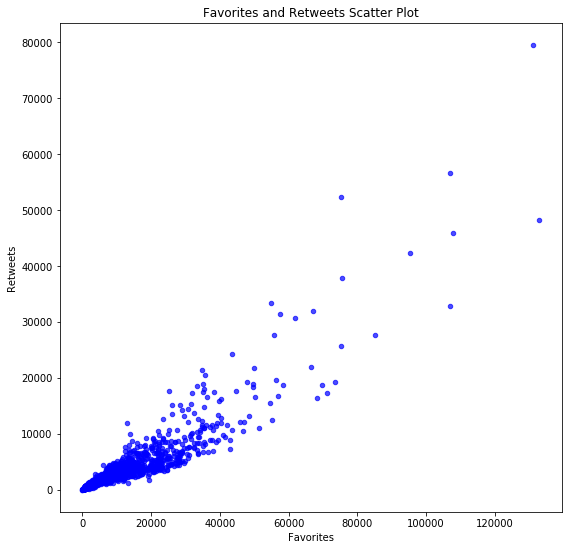

In [72]:
wrangled_df.plot(kind ='scatter', x='likes', y='retweets', alpha = 0.7, figsize=(9,9), color='blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Favorites and Retweets Scatter Plot')

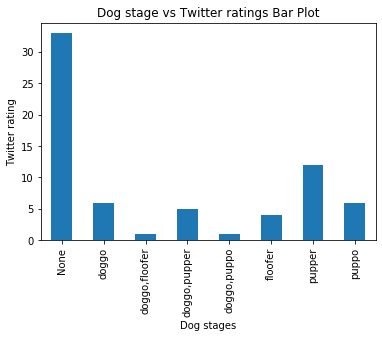

In [73]:
wrangled_df.groupby('dog_stage')['rating'].nunique().plot(kind='bar')
plt.xlabel('Dog stages')
plt.ylabel('Twitter rating')
plt.title('Dog stage vs Twitter ratings Bar Plot')
plt.show()

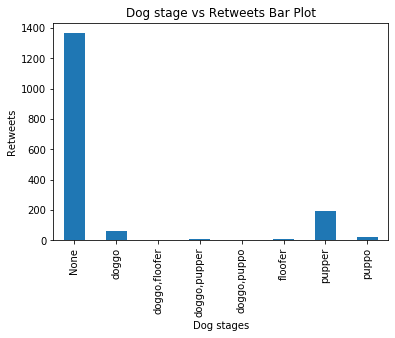

In [74]:
wrangled_df.groupby('dog_stage')['retweets'].nunique().plot(kind='bar')
plt.xlabel('Dog stages')
plt.ylabel('Retweets')
plt.title('Dog stage vs Retweets Bar Plot')
plt.show()

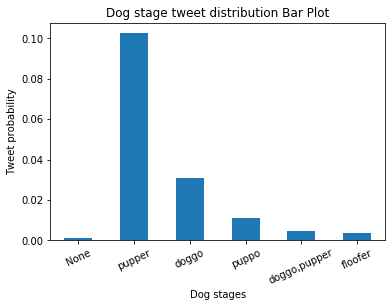

In [75]:
#https://stackoverflow.com/questions/37598665/how-to-plot-a-value-counts-in-pandas-that-has-a-huge-number-of-different-counts

s2 = wrangled_df['dog_stage']
prob = s2.value_counts(normalize=True)
threshold = 0.002
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['None'] = tail_prob
prob.plot(kind='bar')
plt.xlabel('Dog stages')
plt.ylabel('Tweet probability')
plt.title('Dog stage tweet distribution Bar Plot')
plt.xticks(rotation=25)
plt.show()

In [76]:
wrangled_df.to_csv('twitter_archive_master_new.csv', encoding='utf-8', index=False)